&nbsp;
<div style="text-align: center;">

## <span style="color: black;">Website Restoparts - restoration parts</span>

&nbsp;
<center><img src="restoparts_logo.png"/></center>


&nbsp;

### <span style="color: black;">Descriptive analysis</span>

#### <span style="color: #003E99;">804 classic car body parts</span>

## Index

- [<font color='black'> 1. Packages installation</font>](#1)



- [<font color='black'> 2. Data importation</font>](#2)



- [<font color='black'> 3. Descriptive analysis</font>](#3)
    - [<font color='black'> 3.1. Top 10 composition </font>](#3.1)
    - [<font color='black'> 3.2. Top 10 finish </font>](#3.2)


 
  




## 1. Packages installation
<a id='1'>

In [1]:
# dataset
import pandas as pd

# graph
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.lines as mlines
import ast

## 2. Data importation
<a id='2'>

In [2]:
db = pd.read_csv('Bodyworkparts_processeddata.csv', sep=';')

In [3]:
db.head()

,Name,Weight (kg),Length (mm),Width (mm),Height (mm),Price (€),ID_part,ID_model,ID_product_type,ID_composition,ID_finish
0,"DRAIN PLUG, FLOOR & TRUNK PAN, 1967-77 GM (STA...",0.09,127.00,88.90,5.08,5.94,0,"[164, 174, 131, 390, 147, 295, 153, 429, 251, ...",0,[0],-1
1,"SCREEN, COWL VENT, 1968-72 A-BODY, 1969-72 GRA...",0.14,375.92,121.92,38.10,22.94,1,"[75, 373, 175, 400, 306, 252, 299, 39, 304]",1,[1],0
2,"SPRING, HOOD HINGE, 1964-67/1970-72 A-BODY",0.91,187.96,45.72,30.48,12.74,2,"[368, 365, 379, 238, 19, 313, 339, 300, 355, 4...",2,[0],1
3,"1964-1977 HOOD ADJUSTER BOLT KIT, GM A-BODY, R...",0.05,50.80,30.48,25.40,12.74,3,"[329, 442, 414, 66, 27, 100, 230, 246, 146, 17...",3,[-1],-1
4,"HOOD PIN SET, 1970-72 CHEVELLE/EL CAMINO, SS",1.36,142.24,86.36,25.40,31.44,4,"[163, 392, 404, 91, 31, 29, 41, 231, 434, 254,...",4,[0],-1


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             804 non-null    object 
 1   Weight (kg)      804 non-null    float64
 2   Length (mm)      804 non-null    float64
 3   Width (mm)       804 non-null    float64
 4   Height (mm)      804 non-null    float64
 5   Price (€)        804 non-null    float64
 6   ID_part          804 non-null    int64  
 7   ID_model         804 non-null    object 
 8   ID_product_type  804 non-null    int64  
 9   ID_composition   804 non-null    object 
 10  ID_finish        804 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 69.2+ KB


In [5]:
db.describe(include='all')

,Name,Weight (kg),Length (mm),Width (mm),Height (mm),Price (€),ID_part,ID_model,ID_product_type,ID_composition,ID_finish
count,804,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804,804.000000,804,804.000000
unique,804,NaN,NaN,NaN,NaN,NaN,NaN,222,NaN,16,NaN
top,"DRAIN PLUG, FLOOR & TRUNK PAN, 1967-77 GM (STA...",NaN,NaN,NaN,NaN,NaN,NaN,[313],NaN,[0],NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,42,NaN,630,NaN
mean,NaN,8.745560,960.312711,448.843905,153.414104,187.245983,401.500000,NaN,29.210199,NaN,2.541045
std,NaN,11.131222,647.179631,389.646174,127.593877,174.298884,232.239101,NaN,18.734279,NaN,2.190676
min,NaN,0.000000,0.000000,0.000000,0.000000,0.840000,0.000000,NaN,0.000000,NaN,-1.000000
25%,NaN,1.270000,424.815000,139.700000,50.800000,59.490000,200.750000,NaN,12.000000,NaN,0.000000
50%,NaN,3.450000,952.500000,330.200000,127.000000,124.090000,401.500000,NaN,31.000000,NaN,4.000000
75%,NaN,13.060000,1524.000000,670.560000,228.600000,267.102500,602.250000,NaN,40.000000,NaN,4.000000


In [6]:
db['ID_part'] = db['ID_part'].astype('object')
db['ID_product_type'] = db['ID_product_type'].astype('object')
db['ID_finish'] = db['ID_finish'].astype('object')
db['ID_composition'] = db['ID_composition'].astype('object')

## 3. Descriptive analysis
<a id='3'>

### 3.1. Top 10 composition
<a id='3.1'>

In [8]:
db_composition = pd.read_csv('restoparts_composition.csv', sep=';')

In [9]:
db_composition.head()

,ID_composition,Composition
0,0,steel production chromium steel 18/8 hot rolled
1,1,polypropylene
2,2,rubber production
3,3,jute production
4,4,zinc production


In [10]:
db_composition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_composition  13 non-null     int64 
 1   Composition     13 non-null     object
dtypes: int64(1), object(1)
memory usage: 340.0+ bytes


In [11]:
db_composition['ID_composition'] = db_composition['ID_composition'].astype('string')

In [12]:
# remove list from numbers of db

db['ID_composition'] = db['ID_composition'].str.replace('[\[\]]', '', regex=True)

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             804 non-null    object 
 1   Weight (kg)      804 non-null    float64
 2   Length (mm)      804 non-null    float64
 3   Width (mm)       804 non-null    float64
 4   Height (mm)      804 non-null    float64
 5   Price (€)        804 non-null    float64
 6   ID_part          804 non-null    object 
 7   ID_model         804 non-null    object 
 8   ID_product_type  804 non-null    object 
 9   ID_composition   804 non-null    object 
 10  ID_finish        804 non-null    object 
dtypes: float64(5), object(6)
memory usage: 69.2+ KB


In [13]:
db_composition['ID_composition'].tolist()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [15]:
# merge composition names to ID's

db_composition_names = pd.merge(db, db_composition[['ID_composition', 'Composition']], on='ID_composition', how='left')

db_composition_names.rename(columns={'Composition': 'Composition_name'}, inplace=True)
db_composition_names.head()

,Name,Weight (kg),Length (mm),Width (mm),Height (mm),Price (€),ID_part,ID_model,ID_product_type,ID_composition,ID_finish,Composition_name
0,"DRAIN PLUG, FLOOR & TRUNK PAN, 1967-77 GM (STA...",0.09,127.00,88.90,5.08,5.94,0,"[164, 174, 131, 390, 147, 295, 153, 429, 251, ...",0,0,-1,steel production chromium steel 18/8 hot rolled
1,"SCREEN, COWL VENT, 1968-72 A-BODY, 1969-72 GRA...",0.14,375.92,121.92,38.10,22.94,1,"[75, 373, 175, 400, 306, 252, 299, 39, 304]",1,1,0,polypropylene
2,"SPRING, HOOD HINGE, 1964-67/1970-72 A-BODY",0.91,187.96,45.72,30.48,12.74,2,"[368, 365, 379, 238, 19, 313, 339, 300, 355, 4...",2,0,1,steel production chromium steel 18/8 hot rolled
3,"1964-1977 HOOD ADJUSTER BOLT KIT, GM A-BODY, R...",0.05,50.80,30.48,25.40,12.74,3,"[329, 442, 414, 66, 27, 100, 230, 246, 146, 17...",3,-1,-1,NaN
4,"HOOD PIN SET, 1970-72 CHEVELLE/EL CAMINO, SS",1.36,142.24,86.36,25.40,31.44,4,"[163, 392, 404, 91, 31, 29, 41, 231, 434, 254,...",4,0,-1,steel production chromium steel 18/8 hot rolled


In [16]:
db_composition_names['Composition_name'].unique().tolist()

['steel production chromium steel 18/8 hot rolled',
 'polypropylene',
 nan,
 'rubber production',
 'jute production',
 'zinc production',
 'acrylonitrile-butadiene-styrene',
 'polyamide',
 'reinforcing steel',
 'sheet rolling aluminium',
 'steel production converted low-alloyed',
 'polyurethane production',
 'glass fibre reinforced plastic',
 'steel production converted']

In [17]:
# change names

db_composition_names['Composition_name'] = db_composition_names['Composition_name'].replace('steel production chromium steel 18/8 hot rolled', 'steel (hot rolled)')
db_composition_names['Composition_name'] = db_composition_names['Composition_name'].replace('rubber production', 'rubber')
db_composition_names['Composition_name'] = db_composition_names['Composition_name'].replace('jute production', 'jute')
db_composition_names['Composition_name'] = db_composition_names['Composition_name'].replace('zinc production', 'zinc')
db_composition_names['Composition_name'] = db_composition_names['Composition_name'].replace('sheet rolling aluminium', 'aluminum')
db_composition_names['Composition_name'] = db_composition_names['Composition_name'].replace('steel production converted low-alloyed', 'steel (converted low-alloyed)')
db_composition_names['Composition_name'] = db_composition_names['Composition_name'].replace('polyurethane production', 'polyurethane')
db_composition_names['Composition_name'] = db_composition_names['Composition_name'].replace('steel production converted', 'steel (converted)')
db_composition_names['Composition_name'] = db_composition_names['Composition_name'].replace('reinforcing steel', 'steel (reinforcement)')

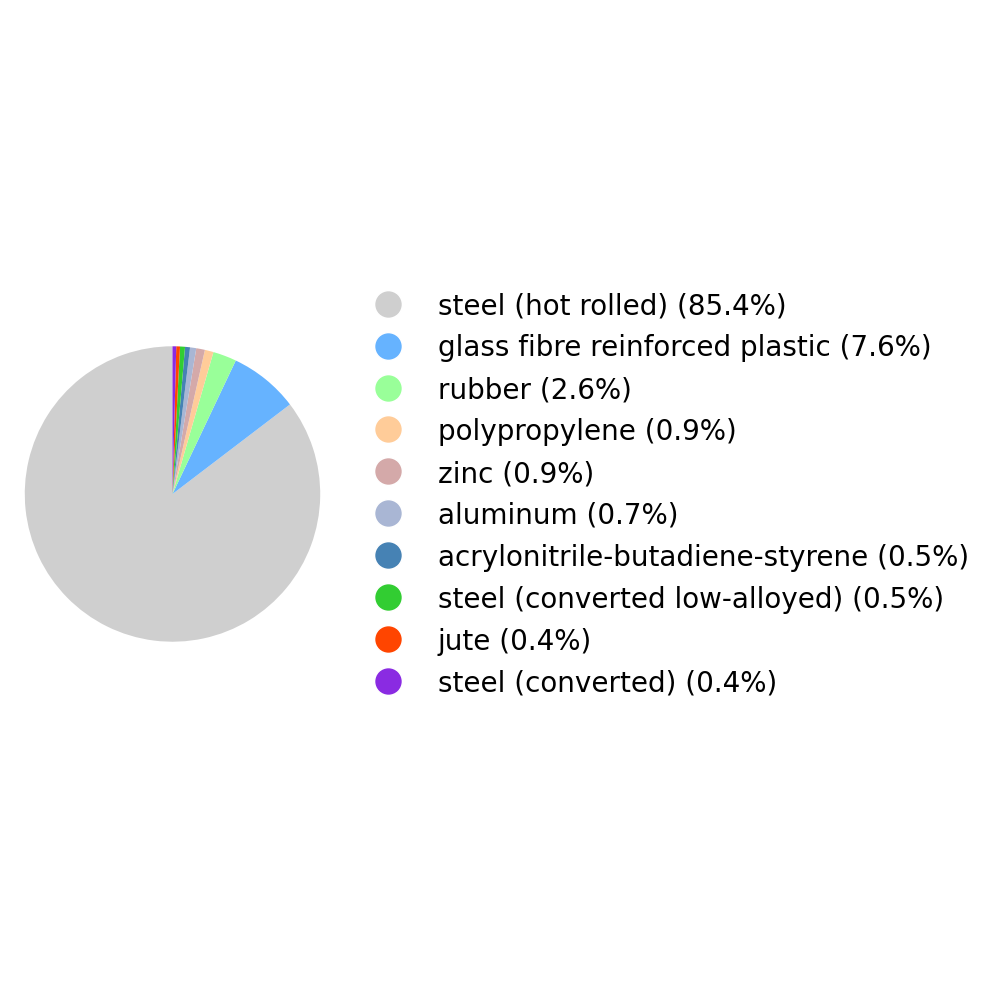

In [19]:


# counting the values in the 'Composition_name' column
top_10_composition = db_composition_names['Composition_name'].value_counts().nlargest(10)

# data and colors
quantities = top_10_composition.values
labels = top_10_composition.index

# defining html colors manually
colors = ['#cfcfcf', '#66B3FF', '#99FF99', '#FFCC99', '#d4a9a9', 
          '#a9b6d4', '#4682B4', '#32CD32', '#FF4500', '#8A2BE2']

# calculating percentages
total = sum(quantities)
percentagens = [(q / total) * 100 for q in quantities]

# figure size
plt.figure(figsize=(10, 10))

# pie chart
pie, texts, autotexts = plt.pie(quantities, labels=None, autopct='', colors=colors, startangle=90)

# create handles for the legend
legend_handles = [mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=20) for color in colors]

# formatting labels
formatted_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(labels, percentagens)]  # full name with percentage

# add legends with handles
plt.legend(
    handles=legend_handles,  # specify handles
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    labels=formatted_labels,  # formatted labels
    fontsize=20,
    frameon=False
)

# axis configuration
plt.axis('equal')

# automatic adjustment
plt.tight_layout()

# save the chart
plt.savefig('DescriptiveAnalysis_Parts_Composition_pie.png', dpi=300)
plt.savefig('DescriptiveAnalysis_Parts_Composition_pie.eps', dpi=300)

# show the chart
plt.show()


### Composition and Weight

In [20]:

# material weight mean
mean_weight_per_material = db_composition_names.groupby('Composition_name')['Weight (kg)'].mean()

# most heaviest
material_mais_pesado = mean_weight_per_material.idxmax()
peso_material_mais_pesado = mean_weight_per_material.max()

print("Heaviest material:", material_mais_pesado)
print("Mean weight:", peso_material_mais_pesado)


Heaviest material: steel (hot rolled)
Mean weight: 10.554190476190477


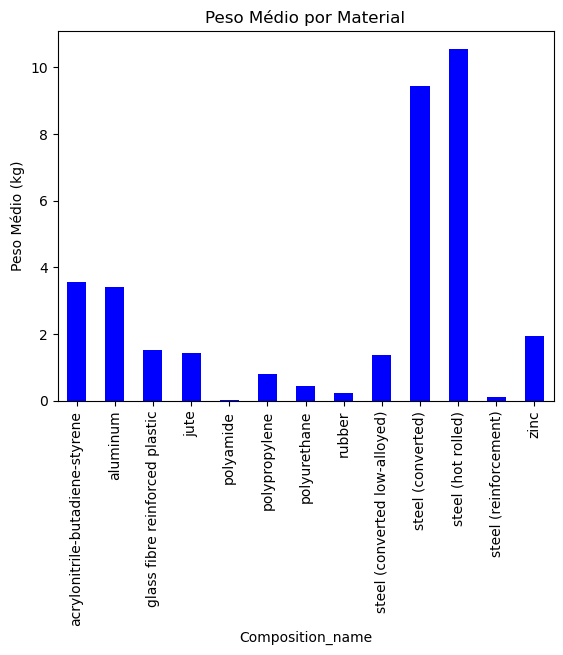

In [21]:
mean_weight_per_material.plot(kind='bar', color='blue')
plt.ylabel('Peso Médio (kg)')
plt.title('Peso Médio por Material')
plt.show()


### density and volume


-> volume=height×width×length

-> densidade= peso/volume

​


In [22]:
# volume (rectangle shape)
db_composition_names['volume'] = db_composition_names['Height (mm)'] * db_composition_names['Width (mm)'] * db_composition_names['Length (mm)']

# volume  mm³ to m³ (1 m³ = 1.000.000.000 mm³)
db_composition_names['volume'] = db_composition_names['volume'] / 1_000_000_000

# verify zero values
db_composition_names = db_composition_names[db_composition_names['volume'] > 0]

# density
db_composition_names['density'] = db_composition_names['Weight (kg)'] / db_composition_names['volume']

# verify inf values
db_composition_names = db_composition_names[db_composition_names['density'] != float('inf')]

# density mean
mean_density_per_material = db_composition_names.groupby('Composition_name')['density'].mean()

# max result
material_mais_denso = mean_density_per_material.idxmax()
densidade_material_mais_denso = mean_density_per_material.max()

print("Material com maior densidade média:", material_mais_denso)
print("Densidade média desse material:", densidade_material_mais_denso)

Material com maior densidade média: rubber
Densidade média desse material: 3316.0317264860946


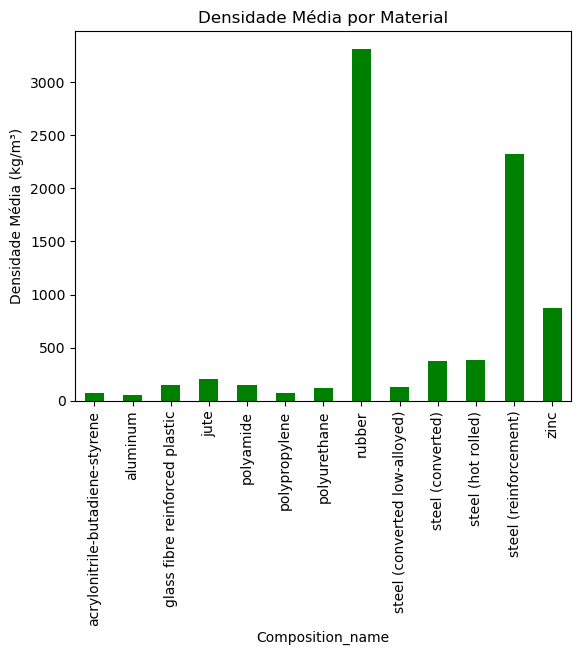

In [23]:
mean_density_per_material.plot(kind='bar', color='green')
plt.ylabel('Densidade Média (kg/m³)')
plt.title('Densidade Média por Material')
plt.show()


In [24]:
table_density= mean_density_per_material.sort_values(ascending=False)
print (table_density)

Composition_name
rubber                             3316.031726
steel (reinforcement)              2325.782404
zinc                                872.275817
steel (hot rolled)                  379.230883
steel (converted)                   378.236315
jute                                207.967737
glass fibre reinforced plastic      152.314237
polyamide                           146.129655
steel (converted low-alloyed)       133.329948
polyurethane                        115.381029
polypropylene                        73.694344
acrylonitrile-butadiene-styrene      71.434136
aluminum                             52.077621
Name: density, dtype: float64


### 3.2. Top 10 finish
<a id='3.2'>

In [25]:
db_finish = pd.read_csv('restoparts_finish.csv', sep=';')

In [26]:
db_finish.head()

,ID_finish,Finish
0,0,electrostatic paint
1,1,zinc coating pieces
2,2,black chrome
3,3,seal production natural rubber
4,4,powder coating steel


In [27]:
db_finish['ID_finish'] = db_finish['ID_finish'].astype('string')
db['ID_finish'] = db['ID_finish'].astype('string')

In [28]:
db['ID_finish'] = db['ID_finish'].str.replace('[\[\]]', '', regex=True)

In [29]:
db_finish['ID_finish'].tolist()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [31]:
# merge finish names to ID's

db_finish_names = pd.merge(db, db_finish[['ID_finish', 'Finish']], on='ID_finish', how='left')

db_finish_names.rename(columns={'Finish': 'Finish_name'}, inplace=True)
db_finish_names.head()

,Name,Weight (kg),Length (mm),Width (mm),Height (mm),Price (€),ID_part,ID_model,ID_product_type,ID_composition,ID_finish,Finish_name
0,"DRAIN PLUG, FLOOR & TRUNK PAN, 1967-77 GM (STA...",0.09,127.00,88.90,5.08,5.94,0,"[164, 174, 131, 390, 147, 295, 153, 429, 251, ...",0,0,-1,NaN
1,"SCREEN, COWL VENT, 1968-72 A-BODY, 1969-72 GRA...",0.14,375.92,121.92,38.10,22.94,1,"[75, 373, 175, 400, 306, 252, 299, 39, 304]",1,1,0,electrostatic paint
2,"SPRING, HOOD HINGE, 1964-67/1970-72 A-BODY",0.91,187.96,45.72,30.48,12.74,2,"[368, 365, 379, 238, 19, 313, 339, 300, 355, 4...",2,0,1,zinc coating pieces
3,"1964-1977 HOOD ADJUSTER BOLT KIT, GM A-BODY, R...",0.05,50.80,30.48,25.40,12.74,3,"[329, 442, 414, 66, 27, 100, 230, 246, 146, 17...",3,-1,-1,NaN
4,"HOOD PIN SET, 1970-72 CHEVELLE/EL CAMINO, SS",1.36,142.24,86.36,25.40,31.44,4,"[163, 392, 404, 91, 31, 29, 41, 231, 434, 254,...",4,0,-1,NaN


In [32]:
db_finish_names['Finish_name'].unique().tolist()

[nan,
 'electrostatic paint',
 'zinc coating pieces',
 'black chrome',
 'seal production natural rubber',
 'powder coating steel',
 'chromium coat electroplating',
 'plastic film',
 'selective coating stainless steel black chrome',
 'enamelling',
 'acrylonitrile-butadiene-styrene']

In [33]:
db_finish_names['Finish_name'] = db_finish_names['Finish_name'].replace('powder coating steel', 'EDP coating')

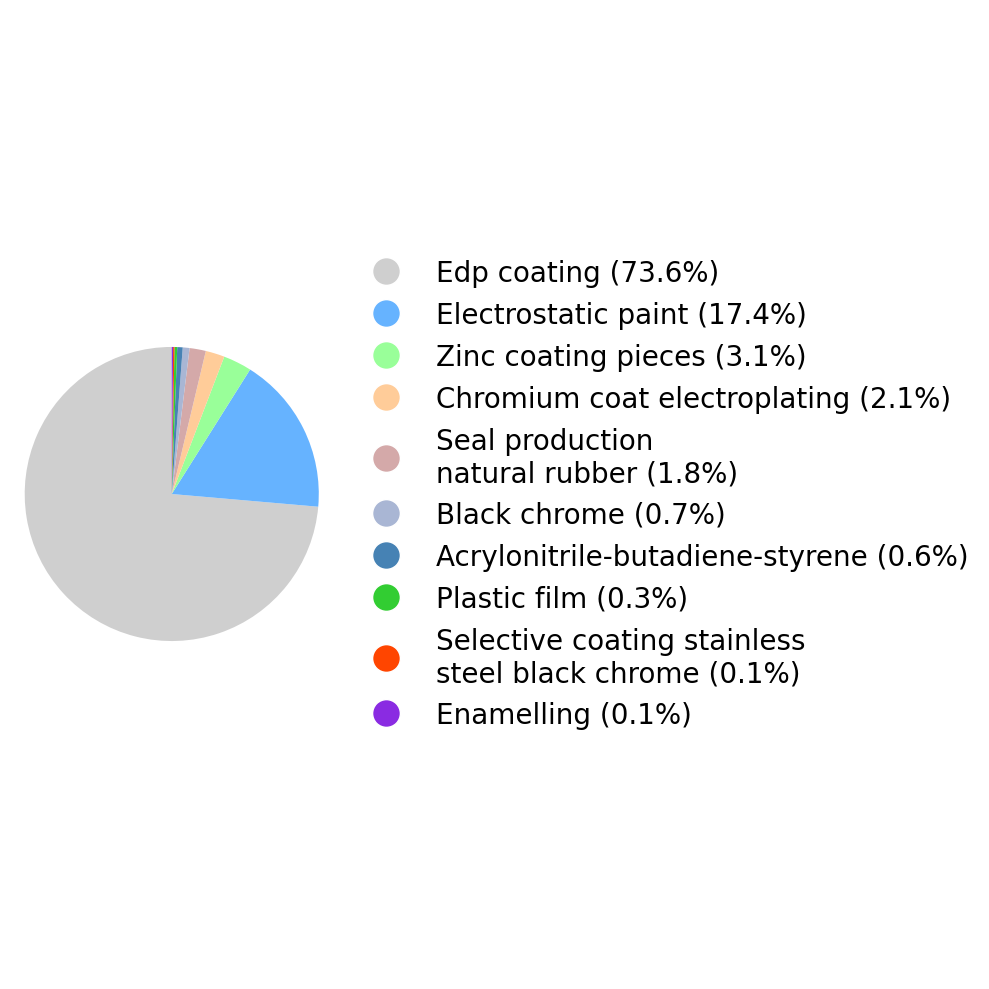

In [34]:
# counting the values in the 'Finish_name' column
top_10_finish = db_finish_names['Finish_name'].value_counts().nlargest(10)

# data and colors
quantities = top_10_finish.values
labels = top_10_finish.index

# defining html colors manually
colors = ['#cfcfcf', '#66B3FF', '#99FF99', '#FFCC99', '#d4a9a9', 
          '#a9b6d4', '#4682B4', '#32CD32', '#FF4500', '#8A2BE2']

# calculating percentages
total = sum(quantities)
percentages = [(q / total) * 100 for q in quantities]

# figure size
plt.figure(figsize=(10, 10))

# pie chart
pie, texts, autotexts = plt.pie(quantities, labels=None, autopct='', colors=colors, startangle=90)

# font size for percentages
for autotext in autotexts:
    autotext.set_fontsize(12)  # set font size for percentages

# create handles for the legend
legend_handles = [mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=20) for color in colors]

# function to format labels with line breaks and capitalization
def format_label(label, percent):
    # capitalize the first letter of the first word
    capitalized_label = label.capitalize()
    
    # if the label has more than 3 words, add a line break
    if len(capitalized_label.split()) > 3:
        words = capitalized_label.split()
        # break the label into two parts
        mid_index = len(words) // 2  # find the middle of the word list
        return ' '.join(words[:mid_index]) + '\n' + ' '.join(words[mid_index:]) + f' ({percent:.1f}%)'
    else:
        return f'{capitalized_label} ({percent:.1f}%)'

# formatting labels
formatted_labels = [format_label(label, percent) for label, percent in zip(labels, percentages)]

# add legends with handles
plt.legend(
    handles=legend_handles,  
    loc='center left', 
    bbox_to_anchor=(1, 0.5), 
    labels=formatted_labels,  
    fontsize=20,
    frameon=False 
)

# axis configuration
plt.axis('equal')

# automatic adjustment
plt.tight_layout()

# save the chart
plt.savefig('DescriptiveAnalysis_Parts_Finish_pie.png', dpi=300)
plt.savefig('DescriptiveAnalysis_Parts_Finish_pie.eps', dpi=300)

# show the chart
plt.show()
